In [36]:
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
dirlst = []
intervention = 'in3hb'#'in3fa' # OT
target = 'sDRS'
for i in range(0, len(os.listdir())-2):
    if target in os.listdir()[i] and intervention in os.listdir()[i]:
        dirlst.append(os.listdir()[i])

In [64]:
dirlst

['model_results_AdaBoostRegressor()_in3hb-sDRS.csv',
 'model_results_BaggingRegressor()_in3hb-sDRS.csv',
 'model_results_DecisionTreeRegressor()_in3hb-sDRS.csv',
 'model_results_ExtraTreesRegressor()_in3hb-sDRS.csv',
 'model_results_GradientBoostingRegressor()_in3hb-sDRS.csv',
 'model_results_Lasso()_in3hb-sDRS.csv',
 'model_results_LinearRegression()_in3hb-sDRS.csv',
 'model_results_MLPRegressor()_in3hb-sDRS.csv',
 'model_results_RandomForestRegressor()_in3hb-sDRS.csv',
 'model_results_RandomForest_in3hb-sDRS.csv',
 'model_results_Ridge()_in3hb-sDRS.csv',
 'summary_in3hb-sDRS-MSE_C.png']

In [65]:
df = pd.read_csv(f'model_results_AdaBoostRegressor()_{intervention}-{target}.csv', header = 0)
# transpose
df = df.T 
# pick first row as col
df.columns = df.iloc[0]
# drop first row
df = df[1:]
print(df)

for file in dirlst:
    dfnew = pd.read_csv(file)
    print(file)
    # transpose
    dfnew = dfnew.T 
    # pick first row as col
    dfnew.columns = dfnew.iloc[0]
    # drop first row
    dfnew = dfnew[1:]
    
    df = df.append(dfnew)

Unnamed: 0          MAE_C     MAE_T     MSE_C     MSE_T      R2_C      R2_T
AdaBoostRegressor()  1.08  1.207306  3.076894  2.895067  0.220261  0.556716
model_results_AdaBoostRegressor()_in3hb-sDRS.csv
model_results_BaggingRegressor()_in3hb-sDRS.csv
model_results_DecisionTreeRegressor()_in3hb-sDRS.csv
model_results_ExtraTreesRegressor()_in3hb-sDRS.csv
model_results_GradientBoostingRegressor()_in3hb-sDRS.csv
model_results_Lasso()_in3hb-sDRS.csv
model_results_LinearRegression()_in3hb-sDRS.csv
model_results_MLPRegressor()_in3hb-sDRS.csv
model_results_RandomForestRegressor()_in3hb-sDRS.csv
model_results_RandomForest_in3hb-sDRS.csv
model_results_Ridge()_in3hb-sDRS.csv


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [66]:
df#new

Unnamed: 0                      MAE_C     MAE_T     MSE_C     MSE_T      R2_C  \
AdaBoostRegressor()              1.08  1.207306  3.076894  2.895067  0.220261   
AdaBoostRegressor()              1.08  1.207306  3.076894  2.895067  0.220261   
BaggingRegressor()           1.398235  0.541176  5.531959  1.158824 -0.738196   
DecisionTreeRegressor()      1.904118  0.705882  5.456088  1.529412 -4.397508   
ExtraTreesRegressor()        1.203529  0.682353  2.595447    1.6874  0.324878   
GradientBoostingRegressor()  1.024706  0.902803  1.571506  1.424748  0.644435   
Lasso()                      1.139412  0.914202  3.518759  1.686641 -0.274733   
LinearRegression()           0.768824  1.692629  1.109959  5.955501  0.805184   
MLPRegressor()               0.947059  0.477507  2.085294  0.614037 -0.208903   
RandomForestRegressor()          1.09  0.808235  2.494288  1.867329  0.389519   
RandomForest                 1.088824  0.759412  2.461653  1.793771  0.407969   
Ridge()                      0.755294  0.680492  0.909529  0.944409  0.624029   

Unnamed: 0                       R2_T  
AdaBoostRegressor()          0.556716  
AdaBoostRegressor()          0.556716  
BaggingRegressor()           0.705572  
DecisionTreeRegressor()      0.567515  
ExtraTreesRegressor()        0.651967  
GradientBoostingRegressor()  0.714296  
Lasso()                      0.536063  
LinearRegression()           0.284905  
MLPRegressor()               0.859761  
RandomForestRegressor()      0.619264  
RandomForest                 0.646493  
Ridge()                      0.824098

In [67]:
df = df[1:]
names = ['Ada Boost', 'Bagging', 'CFR', 'Decision Tree', 'Extra Trees', 'Gradient Boost',
        'Lasso Regression', 'Linear Regression', 'Multi Layer Perceptron',  'Random Forest', 'Ridge']

#df['Unnamed: 0'] = names
df = df.reset_index()
df = df.rename(columns = {"index" : "Model"}) 
df['Model'] = names

In [68]:
df = df[df['Model']!="Random Forest_1"]

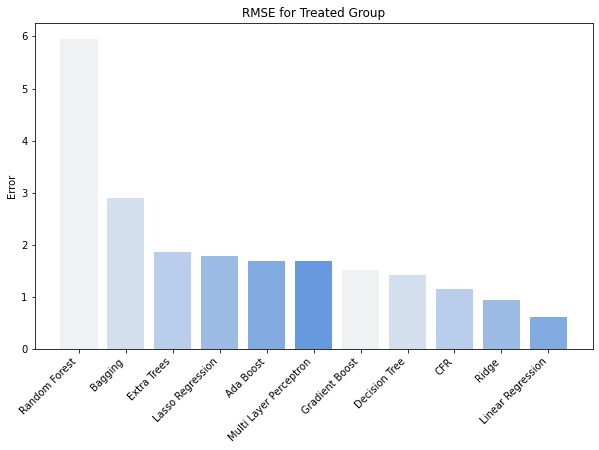

In [70]:
metric = 'MSE_T'

values = df[metric] 

sorted_data = sorted(zip(df["Model"], values), key = lambda x: x[1], reverse = True)
df["Model"], values = zip(*sorted_data)

fig, ax = plt.subplots(figsize = (10,6))

bars = ax.bar(df["Model"], values, color = sns.light_palette("#69d"))

# Rotate the labels to 45 degrees
plt.xticks(rotation=45, ha='right')

# Customize other plot settings as needed (e.g., titles, labels, etc.)

plt.title("RMSE for Treated Group")
plt.ylabel("Error")
plt.savefig(f"summary_{intervention}-{target}-{metric}.png")
# Show the plot
plt.show()